<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/vgg19OnCfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = tk.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
classes = np.unique(y_train)

In [ ]:
len(classes)

10

In [ ]:
x_train[22].shape

(32, 32, 3)

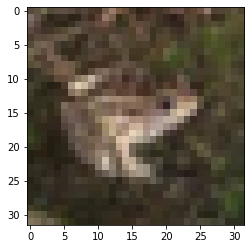

In [ ]:
plt.imshow(x_train[22]);

Normalization

In [ ]:
x_train[22]

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train = x_train/255

In [ ]:
type(x_train)

numpy.ndarray

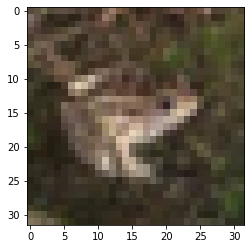

In [ ]:
plt.imshow(x_train[22]);

In [ ]:
x_train

In [ ]:
y_train[0].shape

(1,)

In [ ]:
x_test = x_test/255

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


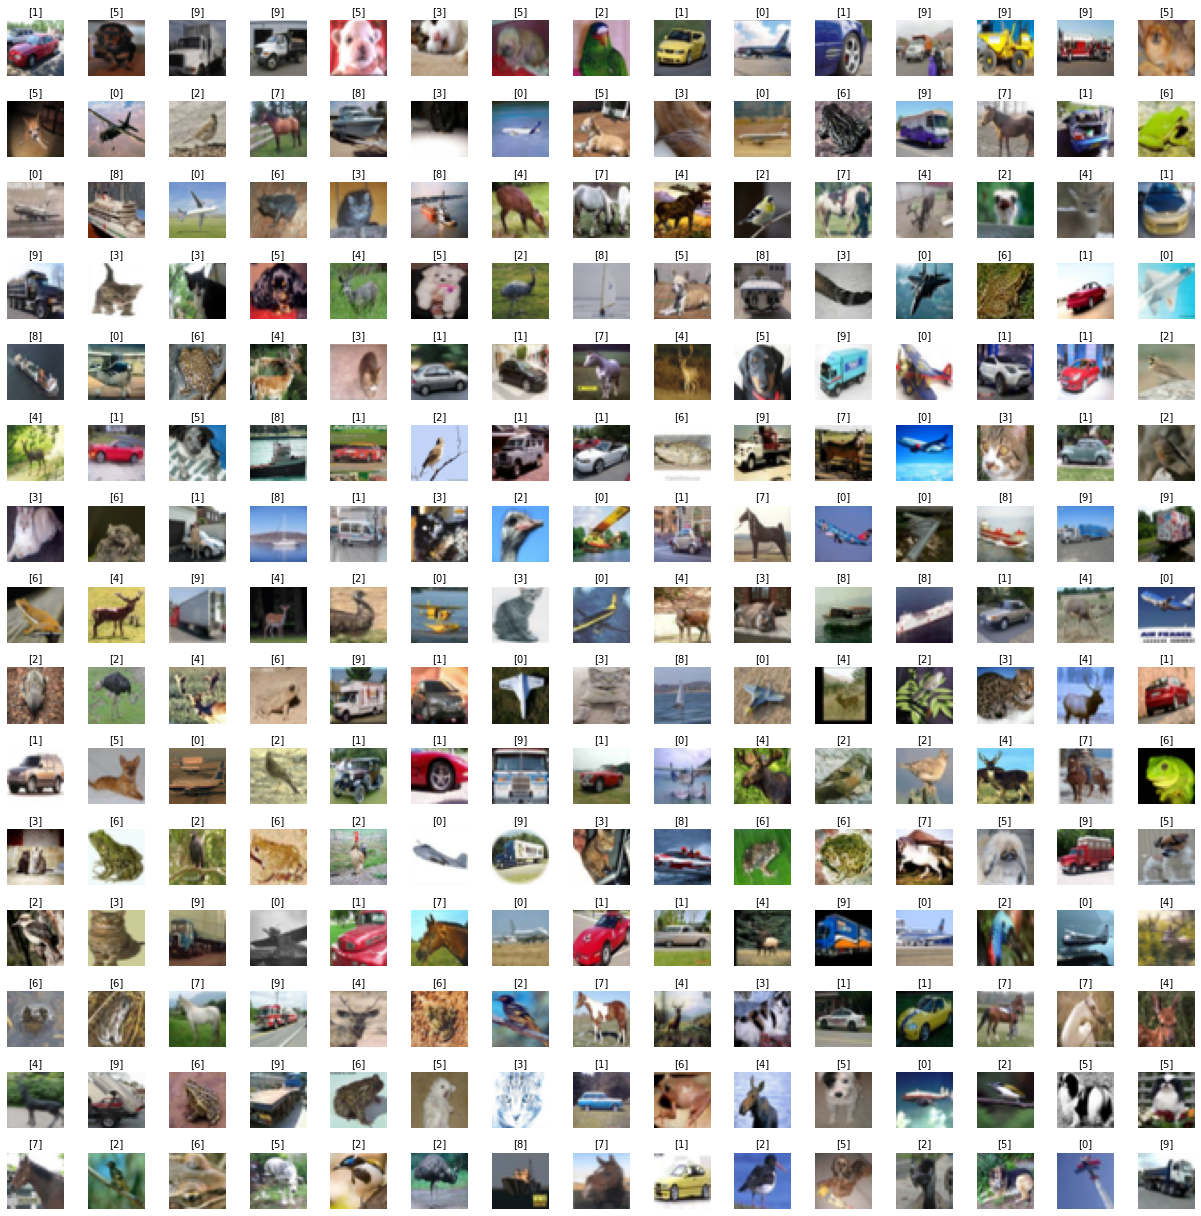

In [ ]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [4]:
vgg19_model = VGG19(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

In [5]:
model = Sequential()
for layer in vgg19_model.layers:
    model.add(layer)

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(4096, activation='relu', name='hidden1'))
# model.add(Dropout(0.4))
# model.add(Dense(4096, activation='relu', name='hidden2'))
# model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_validate, y_validate))

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 65s 38ms/step - loss: 2.3591 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 2/100
 263/1250 [=====>........................] - ETA: 33s - loss: 2.3028 - accuracy: 0.0985

KeyboardInterrupt: ignored

In [ ]:
evaluation = model.evaluate(x_test,y_test)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

In [ ]:
predicted_classes = model.predict(x_test)
len(predicted_classes)

In [ ]:
print(predicted_classes[0])
y_test[0]

In [ ]:
np.argmax(predicted_classes[0])

In [ ]:
y_test[0]

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
x_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from vis.utils import utils

In [ ]:
# swap softmax layer with linear layer 
layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[-1].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)

In [ ]:
!pip install tf-keras-vis

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

In [ ]:
gradCam = Gradcam(model, clone =True)

In [ ]:
from matplotlib.pyplot import plt

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

score = CategoricalScore([3, 8, 8 , 0])

In [ ]:
input_classes = ['cat', 'ship', 'ship', 'airplain']

In [ ]:
type(x_test)

In [ ]:
images = [x_test[0], x_test[1], x_test[2], x_test[3]]

In [ ]:
y_test[3]

In [ ]:
plt.imshow(x_test[100])
# y_test[1]

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
input_images = preprocess_input(images)

In [ ]:
input_images

In [ ]:
# plt.imshow(x_test[1])
y_test[3]

Generate Heatmap

In [ ]:
cam = gradCam(score, input_images, penultimate_layer=-1)

show generated images

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(12,4))
for i, img_class in enumerate(input_classes):
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
    ax[i].set_title(img_class, fontsize=16)
    ax[i].imshow(x_test[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.2) 
    ax[i].axis('off')
plt.tight_layout()
plt.show()